##abalone data 를 가지고 학습하기 

In [ ]:
#import 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('/content/abalone.csv')

In [72]:
import csv 
with open('/content/abalone.csv') as csvf: #one_hot_vector 사용을 위한 1차원 배열 요소 만들기?
  csvreader = csv.reader(csvf)
  next(csvreader)

  rows = []
  for row in csvreader:
    rows.append(row)
    

In [73]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [74]:
input_cnt =10
output_cnt = 1

data = np.zeros([len(rows),input_cnt + output_cnt])
print(data.shape)

(4177, 11)


In [75]:
#one_hot_vector 처리 
for n,r in enumerate(rows):
  if r[0] == 'M':
    data[n,0] = 1
  if r[1] == 'F':
    data[n,1] = 1
  if r[2] == 'I':
    data[n,2] = 1
  data[n,3:] = r[1:]

print(data)

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      0.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      0.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]


In [76]:
#train_test_split
train_ratio = 0.8


train_idx = int(train_ratio * data.shape[0])




In [77]:
#shffle map
shffle_map = np.arange(data.shape[0])
np.random.shuffle(shffle_map)
print(shffle_map[:5])

[2380  186 2126   34 1807]


In [78]:
#train_test_split
train_data = data[shffle_map[:train_idx]]
print(train_data.shape)

test_data = data[shffle_map[train_idx:]]
print(test_data.shape)

(3341, 11)
(836, 11)


In [79]:
#train_test_split
train_x,train_y = train_data[:,:-output_cnt] ,train_data[:,-output_cnt:]
test_x,test_y = test_data[:,:-output_cnt] ,test_data[:,-output_cnt:]

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3341, 10)
(836, 10)
(3341, 1)
(836, 1)


In [80]:
#z 정규화 
train_x_mean = np.mean(train_x,axis = 0)
train_x_std = train_x.std(axis = 0)
train_x -=train_x_mean 
train_x /=train_x_std

print(train_x)


[[ 1.32023534         nan         nan ... -1.55814374 -1.56764429
  -1.64253779]
 [-0.75744072         nan         nan ...  0.1435851   1.40437551
   0.33203774]
 [-0.75744072         nan         nan ... -0.53755309 -0.49554582
  -0.38598973]
 ...
 [-0.75744072         nan         nan ... -0.32762853 -0.56792378
  -0.65165989]
 [-0.75744072         nan         nan ...  0.99891599  1.5446078
   1.12904822]
 [ 1.32023534         nan         nan ...  0.72422748  0.65797784
   0.69105147]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [65]:
#test_x 부분에도 z 정규화 적용 
test_x -=train_x_mean
test_x/=train_x_std

print(test_x)



[[-0.74428052         nan         nan ...  0.89175819  0.35470082
   0.36773324]
 [ 1.34357944         nan         nan ...  1.03375739  1.19788415
   0.89514271]
 [-0.74428052         nan         nan ... -0.57105897 -0.49304026
  -0.53536517]
 ...
 [ 1.34357944         nan         nan ...  0.54014112  0.30456559
   0.36773324]
 [-0.74428052         nan         nan ...  0.76779063  0.07212046
  -0.21747453]
 [ 1.34357944         nan         nan ... -0.06166501 -0.4110008
  -0.70153527]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 10,
                                                   activation = 'elu',
                                                   input_shape=(10,)),
                             tf.keras.layers.Dense(units = 24,
                                                   activation ='elu'),
                             tf.keras.layers.Dense(units = 36,
                                                   activation = 'elu'),
                             tf.keras.layers.Dense(units = 1,),
])

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                264       
_________________________________________________________________
dense_14 (Dense)             (None, 36)                900       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07),
              loss = 'mse')



In [69]:
history = model.fit(train_x,train_y,epochs = 25,batch_size = 32,validation_split = 0.2)


Epoch 1/25
84/84 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/25
84/84 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/25
84/84 [==============================] - 0s 2ms/step - loss: nan - 

In [70]:
model.evaluate(test_x,test_y)

27/27 [==============================] - 0s 1ms/step - loss: nan


nan

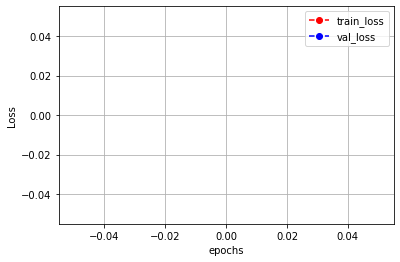

In [71]:
plt.plot(history.history['loss'],'--o',color = 'red',label = 'train_loss')
plt.plot(history.history['val_loss'],'--o',color = 'blue',label = 'val_loss')

plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [82]:
pred_y = model.predict(test_x)
print(pred_y[:10])

test_y[:10]

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


array([[ 9.],
       [16.],
       [12.],
       [ 5.],
       [ 9.],
       [12.],
       [11.],
       [ 7.],
       [ 6.],
       [10.]])

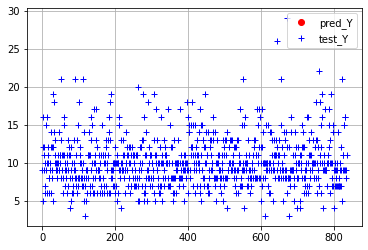

In [84]:
plt.plot(pred_y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_y[:], '+', color = 'blue', label = 'test_Y')

plt.legend()
plt.grid()

plt.show()

In [86]:
#오차율 
acc = 1- np.abs(((pred_y - test_y)/test_y))

print(acc)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]